<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/SlopesXGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2 Classes**
* (1) prevention    36283
* (0) rapid         16337


**3 Classes**
* (1) normal        22980
* (0) rapid         16337
* (2) prevention    13303

## BI3

In [2]:
import pandas as pd
bi3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_3_Group_5_Fold.xlsx')
bi3 = bi3.iloc[:, 1:]
bi3

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
1,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
3,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,4
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,normal,0
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,2


In [3]:
bi3['NATNL'] = bi3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [4]:
bi3 = bi3.sort_values(['PatientUID', 'PatientVisitUID'])
bi3['TimeDiff'] = bi3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi3['TimeDiff'] = bi3['TimeDiff'].fillna(0)

In [5]:
bi3['time_t1'] = pd.to_datetime(bi3['time_t1'])

In [6]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi3[column].unique())}
    bi3[column] = bi3[column].map(encoding_map)

## MF3

In [7]:
import pandas as pd
data3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data3 = data3.iloc[:, 1:]
data3

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,rapid,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,rapid,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,rapid,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,normal,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,prevention,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,normal,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,normal,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,rapid,2


In [8]:
data3['NATNL'] = data3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [9]:
data3 = data3.sort_values(['PatientUID', 'PatientVisitUID'])
data3['TimeDiff'] = data3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data3['TimeDiff'] = data3['TimeDiff'].fillna(0)

In [10]:
data3['time_t1'] = pd.to_datetime(data3['time_t1'])

In [11]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data3[column].unique())}
    data3[column] = data3[column].map(encoding_map)

# Stage

In [12]:
# จารย์บอกให้แก้เป็น
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 0
    elif eGFR_value >= 60:
        return 1
    elif eGFR_value >= 30:
        return 2
    elif eGFR_value >= 15:
        return 3
    else:
        return 4

bi3['Stage'] = bi3['eGFR_t1'].apply(categorize_eGFR)
data3['Stage'] = data3['eGFR_t1'].apply(categorize_eGFR)

In [13]:
data3['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [14]:
!pip install shap

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
import shap
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [20]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# GridSearch

In [21]:
import json

json_file_path = '/content/drive/MyDrive/ckdresearch2023/Assign/GridSearch/xgb_slopes_data3.json'
with open(json_file_path, 'r') as f:
    xgb_slopes_data3 = json.load(f)

print(xgb_slopes_data3)

[{'fold': 1, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -19.38402476062372}, {'fold': 2, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -19.389097361986444}, {'fold': 3, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -19.312577273764536}, {'fold': 4, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -19.2613118789628}, {'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}, 'best_score': -18.838062478925863}]


In [22]:
import json

json_file_path = '/content/drive/MyDrive/ckdresearch2023/Assign/GridSearch/xgb_slopes_binary3.json'
with open(json_file_path, 'r') as f:
    xgb_slopes_binary3 = json.load(f)

print(xgb_slopes_binary3)

[{'fold': 1, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -19.42953107711596}, {'fold': 2, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -19.150570425181467}, {'fold': 3, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -19.35534183756345}, {'fold': 4, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -19.097559896180194}, {'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': -18.65981911415099}]


# Model

## Data3

In [23]:
X = data3.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'LabLocation', 'Fold'], axis=1)
y = data3['Slopes']

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = data3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = data3['Slopes']
all_folds = data3['Fold'].unique()
X_train_scaled_list_data3 = []
y_train_list_data3 = []
X_test_scaled_list_data3 = []
y_test_list_data3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_data3.append(X_train_scaled)
    y_train_list_data3.append(y_train)
    X_test_scaled_list_data3.append(X_test_scaled)
    y_test_list_data3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data3, y_train_list_data3, X_test_scaled_list_data3, y_test_list_data3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")



Fold 1 Evaluation Metrics:
Mean Squared Error: 19.4398
Mean Absolute Error: 2.7944
R-squared: 0.8004

Fold 2 Evaluation Metrics:
Mean Squared Error: 18.2894
Mean Absolute Error: 2.7993
R-squared: 0.8163

Fold 3 Evaluation Metrics:
Mean Squared Error: 18.3725
Mean Absolute Error: 2.7905
R-squared: 0.7925

Fold 4 Evaluation Metrics:
Mean Squared Error: 20.3487
Mean Absolute Error: 2.8752
R-squared: 0.7959

Fold 5 Evaluation Metrics:
Mean Squared Error: 18.0422
Mean Absolute Error: 2.7749
R-squared: 0.8074

Overall Mean Evaluation Metrics:
Mean Squared Error: 18.8985
Mean Absolute Error: 2.8069
Mean R-squared: 0.8025


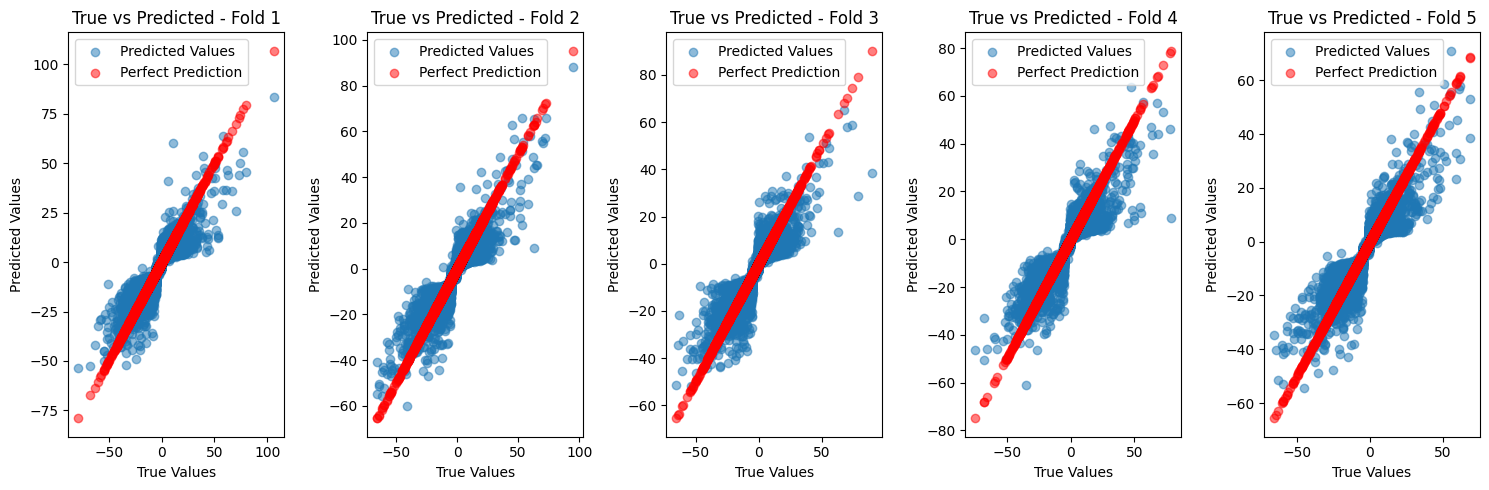

In [24]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data3_mse_scores = []
data3_mae_scores = []
data3_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    best_params = xgb_slopes_data3[fold]['best_params']
    xgbmodel = XGBRegressor(**best_params)
    xgbmodel.fit(X_train_scaled_list_data3[fold], y_train_list_data3[fold])

    # Make predictions on the test data for the current fold
    y_pred = xgbmodel.predict(X_test_scaled_list_data3[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_data3[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_data3[fold], y_test_list_data3[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_data3[fold], y_pred)
    mae = mean_absolute_error(y_test_list_data3[fold], y_pred)
    r2 = r2_score(y_test_list_data3[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    data3_mse_scores.append(mse)
    data3_mae_scores.append(mae)
    data3_r2_scores.append(r2)

# Print mean scores across all folds
data3_mean_mse = sum(data3_mse_scores) / len(data3_mse_scores)
data3_mean_mae = sum(data3_mae_scores) / len(data3_mae_scores)
data3_mean_r2 = sum(data3_r2_scores) / len(data3_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {data3_mean_mse:.4f}")
print(f"Mean Absolute Error: {data3_mean_mae:.4f}")
print(f"Mean R-squared: {data3_mean_r2:.4f}")

plt.tight_layout()
plt.show()


### shap

In [25]:
import shap
shap.initjs()

In [26]:
explainer = shap.Explainer(xgbmodel)
shap_values = explainer(X_train_scaled.head(50))

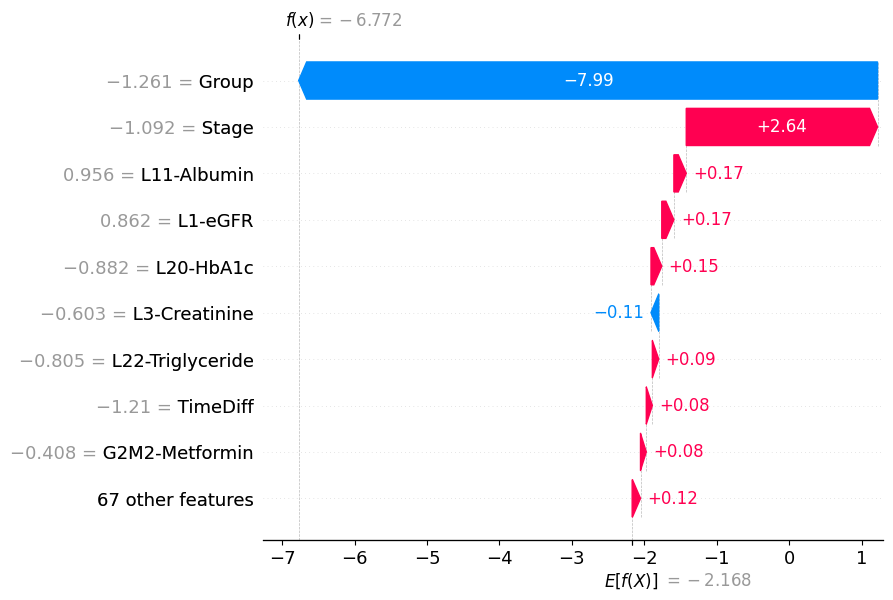

In [27]:
shap.plots.waterfall(shap_values[0])

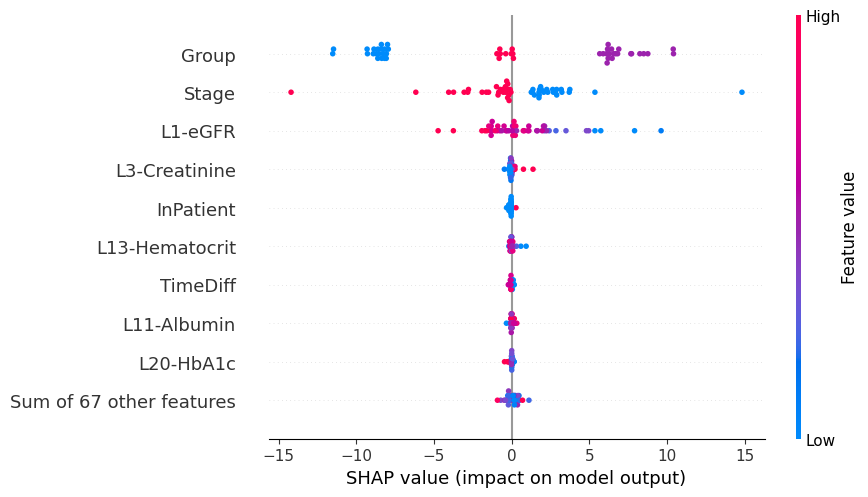

In [30]:
shap.plots.beeswarm(shap_values)

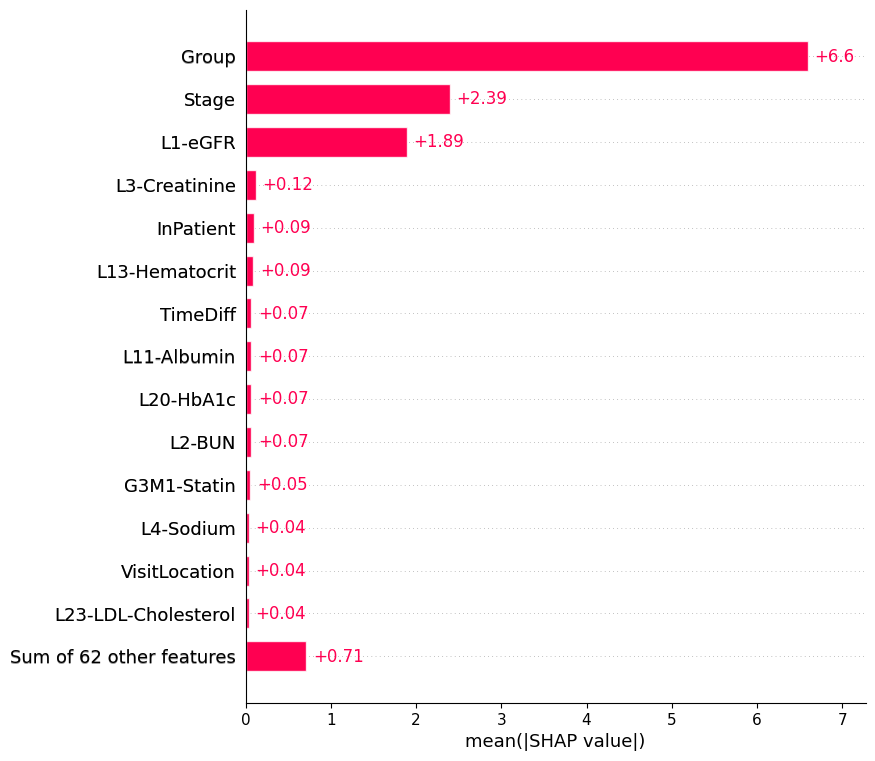

In [32]:
shap.plots.bar(shap_values, max_display=15)

## Binary3

In [33]:
X = bi3.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'LabLocation', 'Fold'], axis=1)
y = bi3['Slopes']

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = bi3['Slopes']
all_folds = bi3['Fold'].unique()
X_train_scaled_list_bi3 = []
y_train_list_bi3 = []
X_test_scaled_list_bi3 = []
y_test_list_bi3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi3.append(X_train_scaled)
    y_train_list_bi3.append(y_train)
    X_test_scaled_list_bi3.append(X_test_scaled)
    y_test_list_bi3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi3, y_train_list_bi3, X_test_scaled_list_bi3, y_test_list_bi3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")



Fold 1 Evaluation Metrics:
Mean Squared Error: 20.2303
Mean Absolute Error: 2.8595
R-squared: 0.7971

Fold 2 Evaluation Metrics:
Mean Squared Error: 17.9520
Mean Absolute Error: 2.7838
R-squared: 0.8083

Fold 3 Evaluation Metrics:
Mean Squared Error: 18.0949
Mean Absolute Error: 2.7894
R-squared: 0.8182

Fold 4 Evaluation Metrics:
Mean Squared Error: 19.0260
Mean Absolute Error: 2.7812
R-squared: 0.8047

Fold 5 Evaluation Metrics:
Mean Squared Error: 18.5087
Mean Absolute Error: 2.7890
R-squared: 0.7909

Overall Mean Evaluation Metrics:
Mean Squared Error: 18.7624
Mean Absolute Error: 2.8006
Mean R-squared: 0.8039


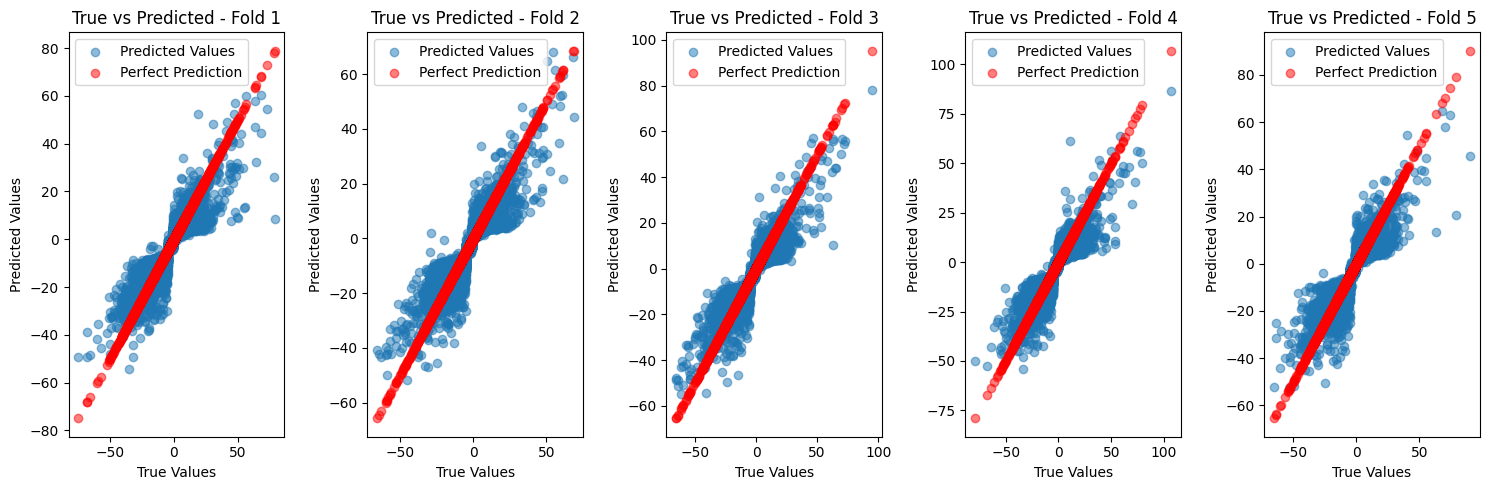

In [34]:
bi3_mse_scores = []
bi3_mae_scores = []
bi3_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    best_params = xgb_slopes_binary3[fold]['best_params']
    xgbmodel2 = XGBRegressor(**best_params)
    xgbmodel2.fit(X_train_scaled_list_bi3[fold], y_train_list_bi3[fold])

    # Make predictions on the test data for the current fold
    y_pred = xgbmodel2.predict(X_test_scaled_list_bi3[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_bi3[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_bi3[fold], y_test_list_bi3[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_bi3[fold], y_pred)
    mae = mean_absolute_error(y_test_list_bi3[fold], y_pred)
    r2 = r2_score(y_test_list_bi3[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    bi3_mse_scores.append(mse)
    bi3_mae_scores.append(mae)
    bi3_r2_scores.append(r2)

# Print mean scores across all folds
bi3_mean_mse = sum(bi3_mse_scores) / len(bi3_mse_scores)
bi3_mean_mae = sum(bi3_mae_scores) / len(bi3_mae_scores)
bi3_mean_r2 = sum(bi3_r2_scores) / len(bi3_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {bi3_mean_mse:.4f}")
print(f"Mean Absolute Error: {bi3_mean_mae:.4f}")
print(f"Mean R-squared: {bi3_mean_r2:.4f}")

plt.tight_layout()
plt.show()


### shap

In [42]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = bi3['Slopes']
all_folds = bi3['Fold'].unique()
X_train_scaled_list_bi3 = []
y_train_list_bi3 = []
X_test_scaled_list_bi3 = []
y_test_list_bi3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi3.append(X_train_scaled)
    y_train_list_bi3.append(y_train)
    X_test_scaled_list_bi3.append(X_test_scaled)
    y_test_list_bi3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi3, y_train_list_bi3, X_test_scaled_list_bi3, y_test_list_bi3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    #print(f"Training set size: {X_train_scaled_fold.shape}")
    #print(f"Test set size: {X_test_scaled_fold.shape}")
    #print(f"Folds in training set: {train_folds.tolist()}")
    #print(f"Folds in test set: {test_fold}")
    #print("---\n")


In [41]:
X_train_scaled.head(1)

,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,G2M2:Metformin,G2M3:DPP4 inhibitor,...,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,TimeDiff,Stage
0,2.991195,-0.700644,-0.128269,-0.177391,-0.331418,-0.331946,-0.093017,-0.288143,-0.407469,-0.221823,...,0.159544,0.159858,0.340357,0.081056,0.087783,0.073409,0.098701,-1.260905,-1.207611,-1.091226


In [43]:
explainer = shap.Explainer(xgbmodel2)
shap_values = explainer(X_train_scaled.head(50))

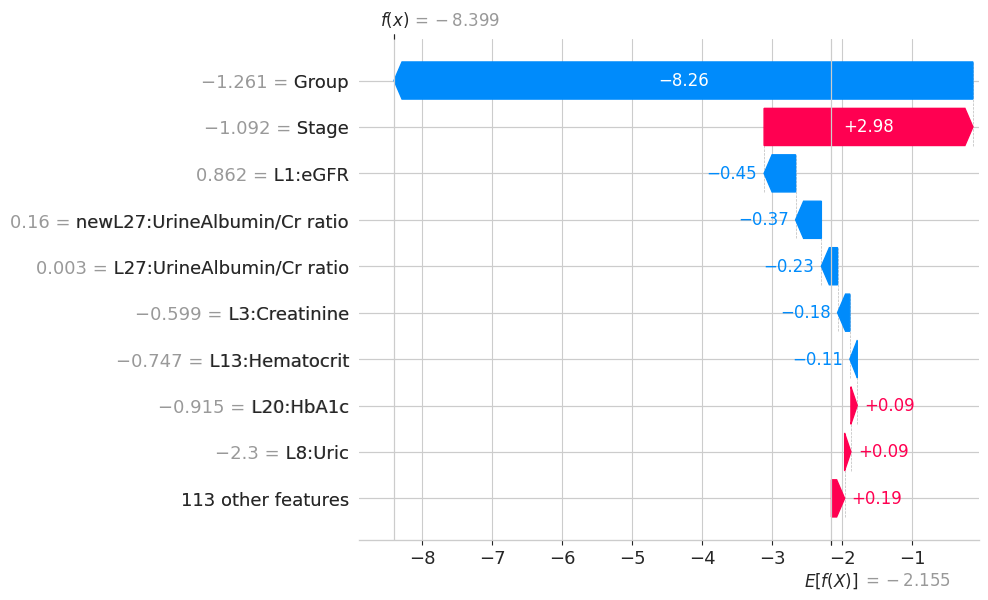

In [44]:
shap.plots.waterfall(shap_values[0])

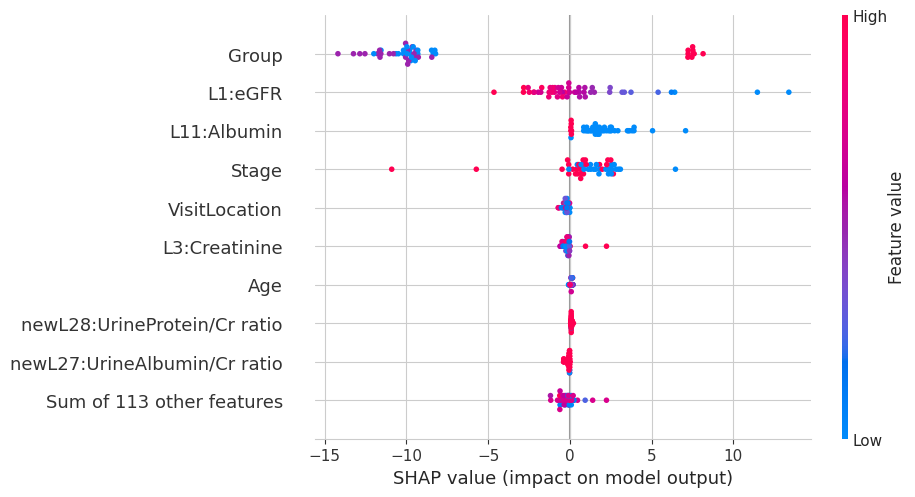

In [45]:
shap.plots.beeswarm(shap_values)

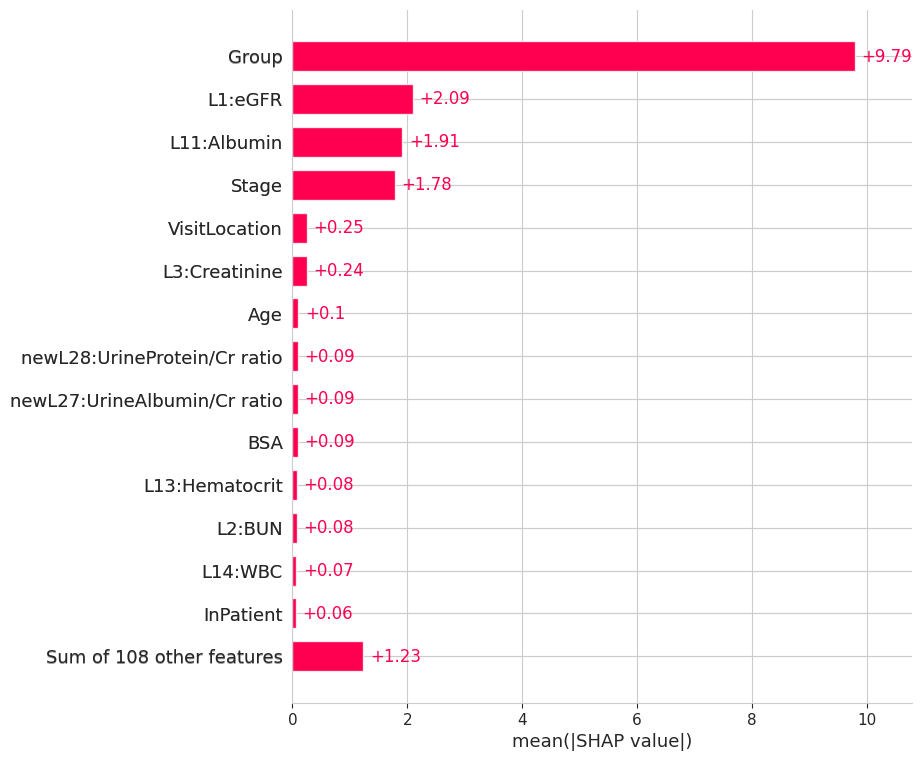

In [46]:
shap.plots.bar(shap_values, max_display=15)

# สรุป Binary3 ดีกว่า

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data3_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': data3_mse_scores,
    'MAE': data3_mae_scores,
    'R2': data3_r2_scores
})


bi3_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': bi3_mse_scores,
    'MAE': bi3_mae_scores,
    'R2': bi3_r2_scores
})
merged_df = pd.merge(data3_df, bi3_df, on='Fold', suffixes=('_data3', '_bi3'))
best_data3_fold = merged_df.loc[merged_df['MSE_data3'].idxmin()]
best_bi3_fold = merged_df.loc[merged_df['MSE_bi3'].idxmin()]

comparison_table = pd.DataFrame({
    'Best_Fold': [best_data3_fold['Fold'], best_bi3_fold['Fold']],
    'Best_MSE': [best_data3_fold['MSE_data3'], best_bi3_fold['MSE_bi3']],
    'Best_MAE': [best_data3_fold['MAE_data3'], best_bi3_fold['MAE_bi3']],
    'Best_R2': [best_data3_fold['R2_data3'], best_bi3_fold['R2_bi3']]
}, index=['Data3', 'Binary3'])
comparison_table

,Best_Fold,Best_MSE,Best_MAE,Best_R2
Data3,5.0,18.042215,2.774902,0.807386
Binary3,2.0,17.951990,2.783848,0.808349
